# (a) Data Preparation

### (i) Load the datasets

In [1]:
import pandas as pd

red_wine_url = 'https://raw.githubusercontent.com/Calvin993/WIA1006/main/Lab2/winequality-red.csv'
white_wine_url = 'https://raw.githubusercontent.com/Calvin993/WIA1006/main/Lab2/winequality-white.csv'

red_wine = pd.read_csv(red_wine_url, sep=';')
white_wine = pd.read_csv(white_wine_url, sep=';')

In [2]:
red_wine.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
pd.isnull(white_wine).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
pd.isnull(red_wine).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# assign labels
white_wine['type'] = 'white'
red_wine['type'] = 'red'

### (ii) Merge the datasets

In [7]:
# merge datasets
wine_data = pd.concat([white_wine, red_wine])

In [8]:
# encode labels
wine_data['type'] = wine_data['type'].map({'white': 0, 'red': 1})

In [9]:
# Remove duplicate rows
wine_data.drop_duplicates(inplace=True)

In [10]:
#Identify the skewness and outliers
skewness = wine_data.skew()
Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((wine_data < (Q1 - 1.5 * IQR)) | (wine_data > (Q3 + 1.5 * IQR))).any(axis=1)

In [11]:
# Remove outliers
wine_data = wine_data[~outliers]

In [12]:
# Split the data into features (X) and target (y)
X = wine_data.drop(['quality', 'type'], axis=1)
y = wine_data['type']

In [13]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000
mean,6.961725,0.311032,0.306587,4.937479,0.048528,30.861799,120.331659,0.993997,3.222191,0.508785,10.591284,5.791718,0.170791
std,0.899279,0.126361,0.115979,4.036692,0.017336,15.859204,51.630389,0.002643,0.150019,0.115399,1.162349,0.774749,0.376373
min,4.700000,0.080000,0.000000,0.600000,0.009000,2.000000,6.000000,0.987110,2.790000,0.220000,8.400000,4.000000,0.000000
25%,6.300000,0.220000,0.250000,1.700000,0.036000,19.000000,89.000000,0.991880,3.120000,0.420000,9.600000,5.000000,0.000000
50%,6.900000,0.280000,0.310000,2.900000,0.045000,29.000000,121.000000,0.994000,3.220000,0.500000,10.400000,6.000000,0.000000
75%,7.500000,0.370000,0.370000,7.600000,0.055000,41.000000,156.000000,0.996040,3.320000,0.580000,11.400000,6.000000,0.000000
max,9.600000,0.675000,0.640000,16.050000,0.108000,78.000000,272.000000,1.000800,3.660000,0.850000,14.200000,7.000000,1.000000


### （iii) Splitting the data into training, validation and testing sets

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# split into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

#scaling features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [16]:
print(X_train)

[[ 1.858876    0.21179487  1.28579383 ...  0.89623949 -1.202308
  -0.93696587]
 [-0.06566376 -1.20185751  0.53184628 ... -1.9800836   0.72442675
   1.24112591]
 [ 0.25509286 -1.43746624  1.28579383 ... -1.71251866 -0.50167718
   0.45701287]
 ...
 [-0.49333927 -0.88771254  0.36430238 ... -1.64562743  0.19895364
   1.06687857]
 [-1.02793365 -0.96624878 -0.38964516 ...  0.62867455 -0.85199259
   1.58962059]
 [-0.06566376 -0.41649508 -0.13832931 ... -0.4415852  -1.72778111
   1.67674426]]


# (b) Model Development

In [17]:
from keras.models import Sequential
from keras.layers import Dense

### Model 1

In [18]:
# Model 1
model_1 = Sequential([
    Dense(8, activation='relu', input_shape=(11,)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])


model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


### Model 2

In [19]:
model_2 = Sequential([
    Dense(16, activation='relu', input_shape=(11,)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


### Model 3

In [20]:

model_3 = Sequential([
    Dense(16, activation='relu', input_shape=(11,)),
    Dense(1, activation='sigmoid')
])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                192       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


### Model 4

In [21]:
model_4 = Sequential([
    Dense(12, activation='relu', input_shape=(11,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                144       
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


### Model 5

In [22]:
model_5 = Sequential([
        Dense(8, activation='relu', input_shape=(11, )),
        Dense(8, activation='relu', input_shape=(11, )),
        Dense(8, activation='relu', input_shape=(11, )),
        Dense(1, activation='sigmoid')
])

model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 96        
                                                                 
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

models = [model_1, model_2, model_3, model_4, model_5]
best_validation_accuracy = 0.0
lowest_training_loss = float('inf')
history_list = []

# Compile and train models
for i, model in enumerate(models, 1):
    print(f'Training model {i}')
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    
    # Define early stopping criteria
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=32,
                        callbacks=[early_stopping],
                        verbose=1)
    
    # Append the history to the list
    history_list.append(history)
    
    # Retrieve the validation accuracy and training loss from history
    val_accuracy = history.history['val_accuracy'][-1]
    train_loss = history.history['loss'][-1]

    # Check if the current model has higher validation accuracy or lower training loss
    if val_accuracy > best_validation_accuracy or (val_accuracy == best_validation_accuracy and train_loss < lowest_training_loss):
        best_model = model
        best_validation_accuracy = val_accuracy
        lowest_training_loss = train_loss
        best_model_index = i


Training model 1
Epoch 1/50
45/45 [==============================] - 1s 6ms/step - loss: 0.4510 - accuracy: 0.8214 - val_loss: 0.3782 - val_accuracy: 0.8901
Epoch 2/50
45/45 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.9076 - val_loss: 0.2725 - val_accuracy: 0.9321
Epoch 3/50
45/45 [==============================] - 0s 3ms/step - loss: 0.2368 - accuracy: 0.9489 - val_loss: 0.1972 - val_accuracy: 0.9601
Epoch 4/50
45/45 [==============================] - 0s 3ms/step - loss: 0.1716 - accuracy: 0.9643 - val_loss: 0.1459 - val_accuracy: 0.9727
Epoch 5/50
45/45 [==============================] - 0s 3ms/step - loss: 0.1285 - accuracy: 0.9769 - val_loss: 0.1120 - val_accuracy: 0.9811
Epoch 6/50
45/45 [==============================] - 0s 3ms/step - loss: 0.1006 - accuracy: 0.9804 - val_loss: 0.0909 - val_accuracy: 0.9825
Epoch 7/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 0.9832 - val_loss: 0.0765 - val_accuracy: 0.9839
Epo

Epoch 9/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9902 - val_loss: 0.0502 - val_accuracy: 0.9916
Epoch 10/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9909 - val_loss: 0.0464 - val_accuracy: 0.9923
Epoch 11/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9923 - val_loss: 0.0438 - val_accuracy: 0.9923
Epoch 12/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9923 - val_loss: 0.0418 - val_accuracy: 0.9930
Epoch 13/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9923 - val_loss: 0.0402 - val_accuracy: 0.9930
Epoch 14/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9930 - val_loss: 0.0389 - val_accuracy: 0.9930
Epoch 15/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9937 - val_loss: 0.0380 - val_accuracy: 0.9930
Epoch 16/50
45

45/45 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9930 - val_loss: 0.0397 - val_accuracy: 0.9944
Epoch 18/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9930 - val_loss: 0.0386 - val_accuracy: 0.9944
Epoch 19/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9937 - val_loss: 0.0376 - val_accuracy: 0.9944
Epoch 20/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9930 - val_loss: 0.0368 - val_accuracy: 0.9944
Epoch 21/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9937 - val_loss: 0.0360 - val_accuracy: 0.9944
Epoch 22/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9937 - val_loss: 0.0354 - val_accuracy: 0.9944
Epoch 23/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9937 - val_loss: 0.0348 - val_accuracy: 0.9944
Epoch 24/50
45/45 [======

45/45 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9951 - val_loss: 0.0343 - val_accuracy: 0.9951
Epoch 26/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9951 - val_loss: 0.0341 - val_accuracy: 0.9951
Epoch 27/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9951 - val_loss: 0.0339 - val_accuracy: 0.9951
Epoch 28/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9951 - val_loss: 0.0339 - val_accuracy: 0.9951
Epoch 29/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9951 - val_loss: 0.0336 - val_accuracy: 0.9958
Epoch 30/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9958 - val_loss: 0.0336 - val_accuracy: 0.9944
Epoch 31/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9951 - val_loss: 0.0336 - val_accuracy: 0.9944
Epoch 32/50
45/45 [======

45/45 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9958 - val_loss: 0.2032 - val_accuracy: 0.9944
Epoch 37/50
45/45 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9958 - val_loss: 0.1979 - val_accuracy: 0.9944
Epoch 38/50
45/45 [==============================] - 0s 3ms/step - loss: 0.1923 - accuracy: 0.9958 - val_loss: 0.1932 - val_accuracy: 0.9944
Epoch 39/50
45/45 [==============================] - 0s 3ms/step - loss: 0.1871 - accuracy: 0.9958 - val_loss: 0.1884 - val_accuracy: 0.9944
Epoch 40/50
45/45 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.9958 - val_loss: 0.1835 - val_accuracy: 0.9944
Epoch 41/50
45/45 [==============================] - 0s 2ms/step - loss: 0.1772 - accuracy: 0.9958 - val_loss: 0.1791 - val_accuracy: 0.9944
Epoch 42/50
45/45 [==============================] - 0s 2ms/step - loss: 0.1726 - accuracy: 0.9965 - val_loss: 0.1747 - val_accuracy: 0.9951
Epoch 43/50
45/45 [======

In [24]:
import matplotlib.pyplot as plt

size = len(history_list)
num_rows = size // 3 + (1 if size % 3 > 0 else 0)
num_cols = 3


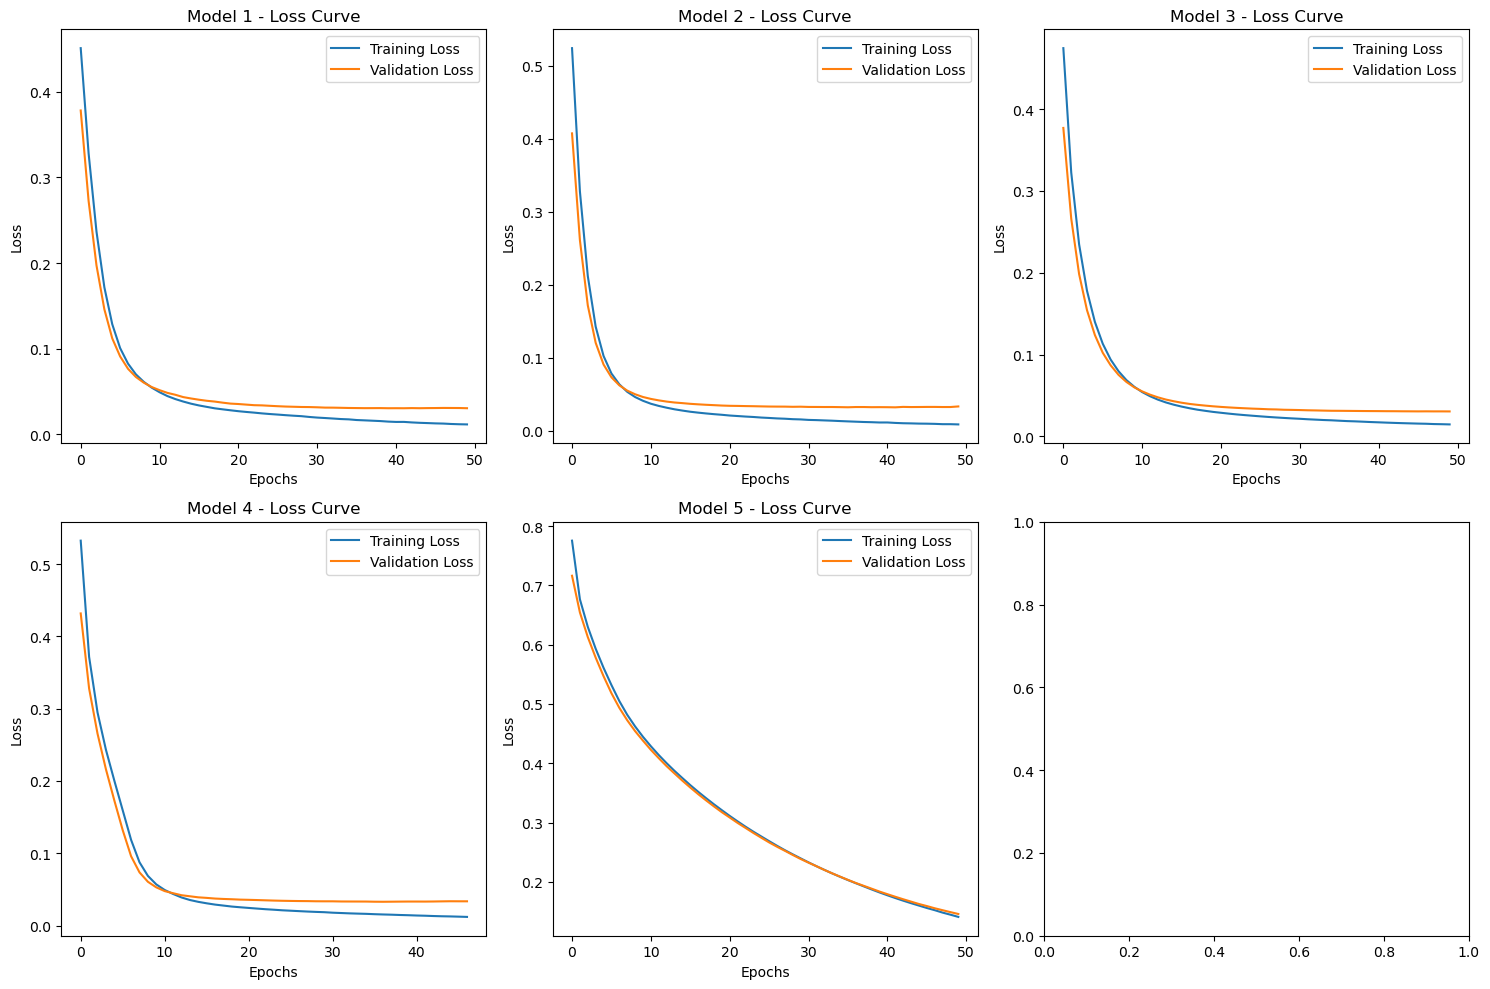

In [25]:

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, history in enumerate(history_list):
    ax = axs[i // 3, i % 3]
    
    # Plot training/validation loss
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.set_title(f'Model {i + 1} - Loss Curve')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    
plt.tight_layout()
plt.show() 

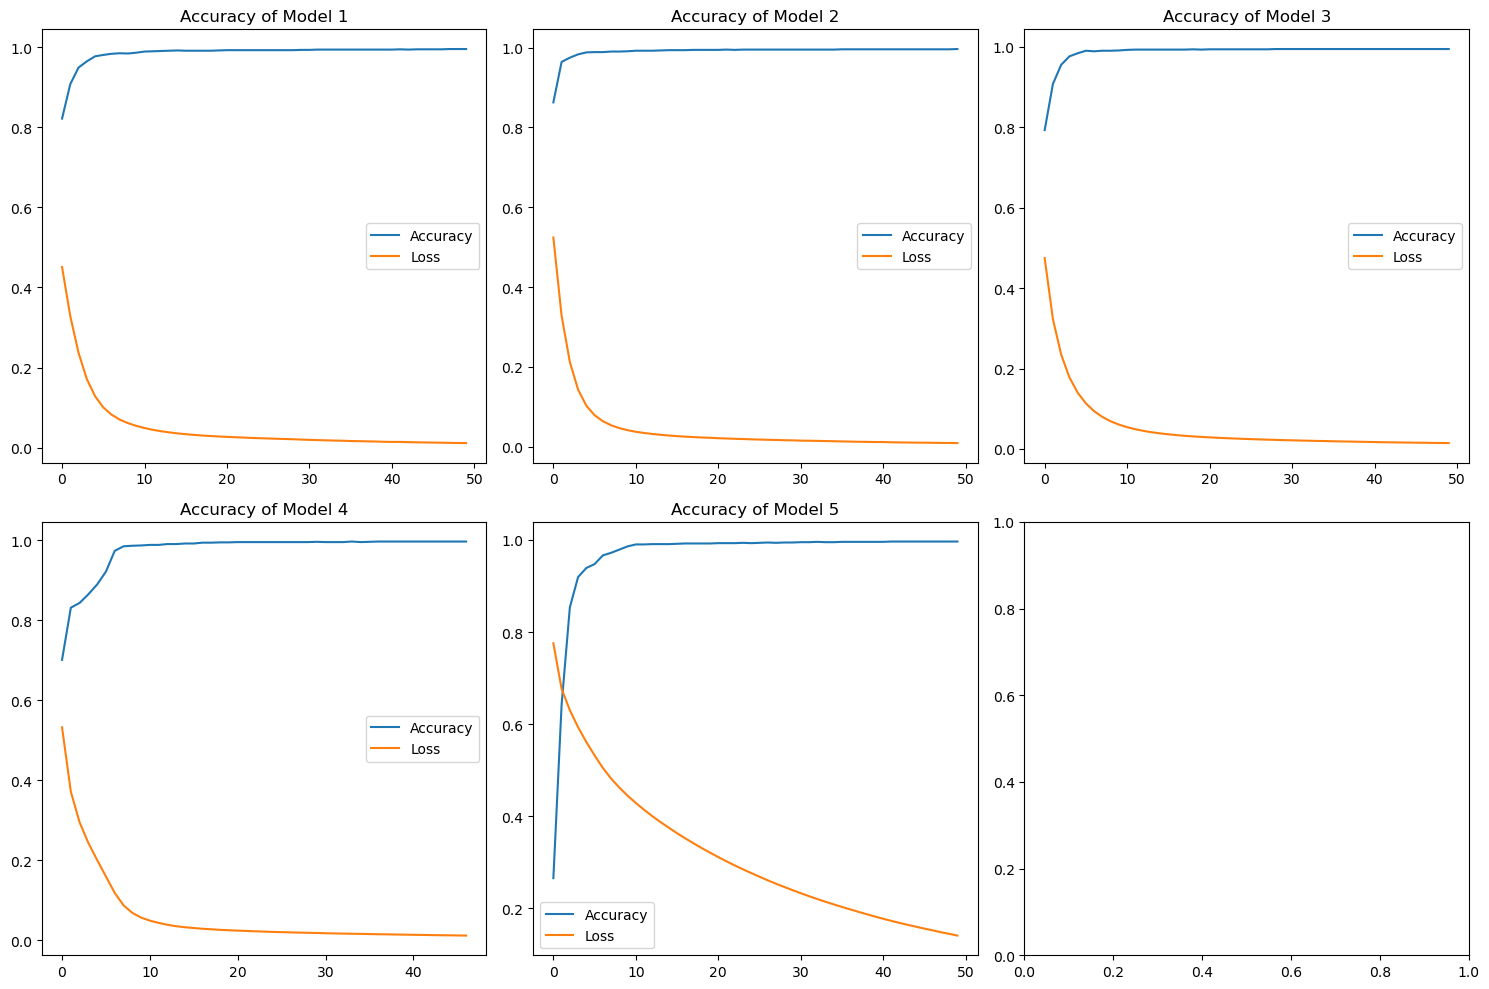

In [26]:
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 10))

for i, history in enumerate(history_list):
    ax = axs[i // 3, i % 3]
    ax.set_title(f'Accuracy of Model {i+1}')
    ax.plot(history.history['accuracy'], label='Accuracy')
    ax.plot(history.history['loss'], label='Loss')
    ax.legend()

plt.tight_layout()
plt.show()

In [27]:
# Print the architecture of the best model
best_model.summary()

# Display the best model and its validation accuracy

print(f"The best model is: Model {best_model_index} with highest validation accuracy and lowest training loss")
print(f"Validation Accuracy: {best_validation_accuracy}")
print(f"Training Loss: {lowest_training_loss}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________
The best model is: Model 2 with highest validation accuracy and lowest training loss
Validation Accuracy: 0.9950980544090271
Training Loss: 0.008896076120436192


## (c) Model Tuning

In [28]:
from itertools import product

# Hyperparameter tuning
learning_rates = [0.1, 0.01, 0.001]
activations = ['relu', 'sigmoid', 'tanh']
optimizers = ['adam', 'sgd', 'rmsprop']

best_accuracy = 0.0
best_model = None
best_hyperparameters = {}

results = []

# Iterate over all combinations of hyperparameters
for lr, activation, optimizer in product(learning_rates, activations, optimizers):
    model = Sequential([
        Dense(16, activation=activation, input_shape=(11,)),
        Dense(4, activation=activation),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=32,
                        callbacks=[early_stopping],
                        verbose=0)

    # Evaluate the model on the testing data
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results.append({
        'Learning Rate': lr,
        'Activation Function': activation,
        'Optimizer': optimizer,
        'Testing Accuracy': accuracy
    })

    # Check if the current model has higher accuracy than the best model so far
    if accuracy >= best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_hyperparameters = {
            'Learning Rate': lr,
            'Activation Function': activation,
            'Optimizer': optimizer,
            'Testing Accuracy': accuracy
        }

# Create a dataframe to display the results
results_df = pd.DataFrame(results)

# Sort the results table by accuracy in descending order
results_sorted = results_df.sort_values(by='Testing Accuracy', ascending=False)

# Select the top 10 combinations
results_sorted = results_sorted.head(10).reset_index(drop=True)

# Display the top 10 results
print(results_sorted)
print()

# Display the best hyperparameters and accuracy
print("Best Hyperparameters:")
print("Activation Function:", best_hyperparameters['Activation Function'])
print("Learning Rate:", best_hyperparameters['Learning Rate'])
print("Optimizer:", best_hyperparameters['Optimizer'])
print("Accuracy:", best_hyperparameters['Testing Accuracy'])


   Learning Rate Activation Function Optimizer  Testing Accuracy
0          0.100                tanh       sgd          0.998367
1          0.100                relu      adam          0.997551
2          0.100                tanh   rmsprop          0.997551
3          0.001                tanh   rmsprop          0.997551
4          0.010                tanh       sgd          0.996735
5          0.100                tanh      adam          0.996735
6          0.001                tanh       sgd          0.996735
7          0.010                relu   rmsprop          0.996735
8          0.010             sigmoid      adam          0.996735
9          0.010                tanh   rmsprop          0.996735

Best Hyperparameters:
Activation Function: tanh
Learning Rate: 0.1
Optimizer: sgd
Accuracy: 0.9983673691749573


## (d) Model Evaluation

In [29]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, f1_score

y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)

print(confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


39/39 [==============================] - 0s 925us/step
[[1025    0]
 [   2  198]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1025
           1       1.00      0.99      0.99       200

    accuracy                           1.00      1225
   macro avg       1.00      0.99      1.00      1225
weighted avg       1.00      1.00      1.00      1225



Accuracy Score:
0.9983673469387755


In [39]:
y_pred = np.round(best_model.predict(X_test))
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy : %.4f' % acc)
print('Test Loss     : %.4f' % loss)

loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy : %.4f' % acc)
print('Train Loss     : %.4f' % loss)

39/39 [==============================] - 0s 828us/step
Test Accuracy : 0.9976
Test Loss     : 0.0161
Train Accuracy : 0.9972
Train Loss     : 0.0114


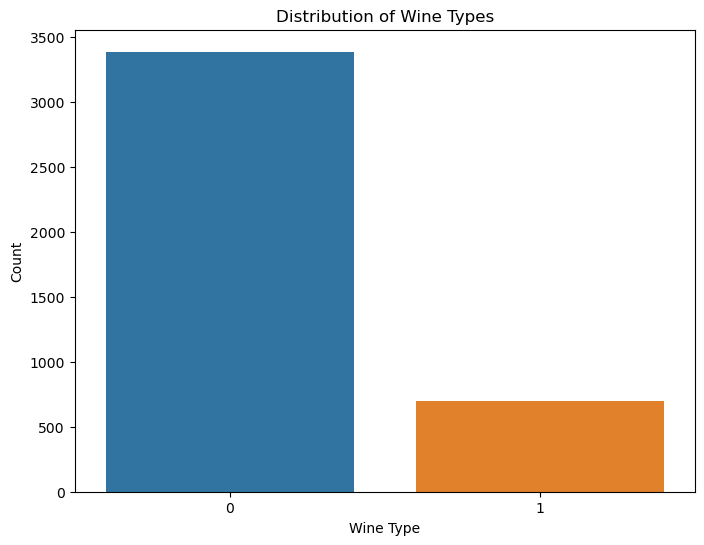

In [44]:
# Plot histogram of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=wine_data)
plt.title('Distribution of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.show()

In [30]:
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[0, 1]), 
             index=['true:White', 'true:Red'], 
             columns=['pred:White', 'pred:Red']
            )

,pred:White,pred:Red
true:White,1025,0
true:Red,2,198


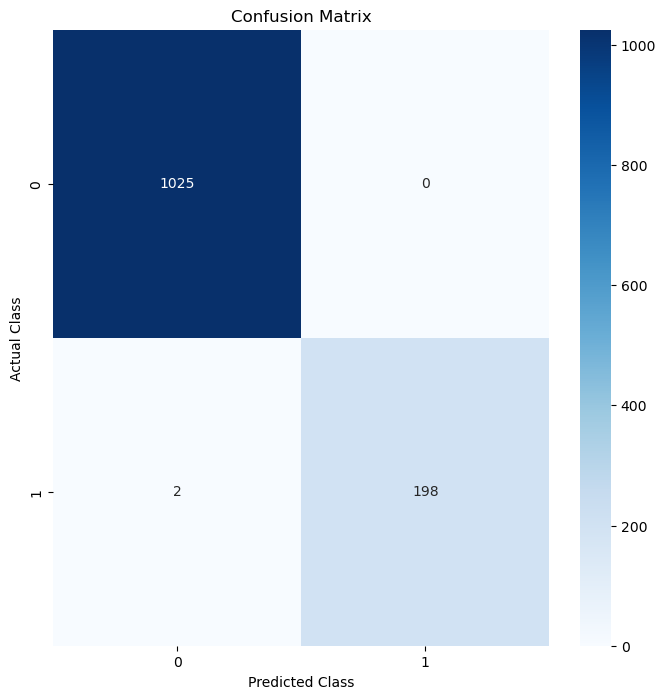

In [31]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [33]:
y_test_prob = best_model.predict(X_test)

39/39 [==============================] - 0s 919us/step


In [34]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

In [35]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_test_prob)

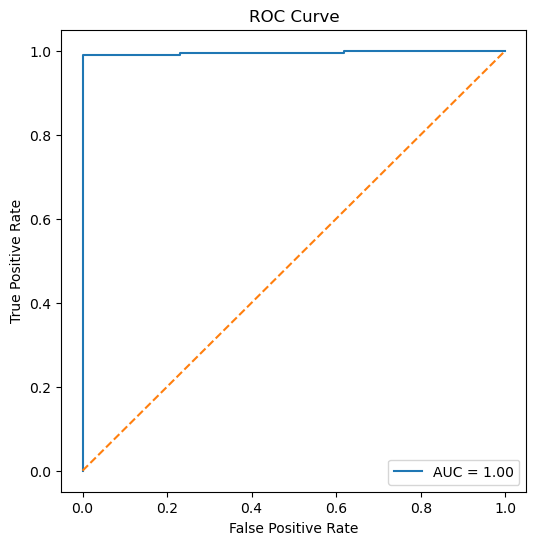

In [36]:
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()